In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Retail_Supermarket.csv")

In [3]:
df.shape

(2931, 20)

In [4]:
df.head()

,CustomerID,Profitiblity,Tenure,TakenFreeDelivery,CityTier,HighestSaving,PreferredPaymentMode,Gender,Age,FootfallInDiscountPeriod,TakenProdFromPromo,SatisfactionScore,MembershipCard,SavingPercent,Complain,AvgSaving,LastMonthCouponUsed,VisitInLastMonth,AvgNumberOfProduct,AvgBillAmount
0,900000002,48.6084,1.000000,1,1,24.30420,Debit Card,Male,50,0,1,3,Silver,2.272727,1,24.30420,0,0.169959,5.020586,1069.3848
1,900000003,490.2210,1.012853,1,3,245.11050,Debit Card,Male,80,0,0,5,Silver,2.000000,0,196.08840,0,2.693522,29.531386,9804.4200
2,900000007,146.0637,0.558714,1,1,102.24459,Credit Card,Male,34,1,1,2,Diamond,1.428571,1,43.81911,2,0.233329,3.110890,3067.3377
3,900000008,146.4147,0.872670,1,3,131.77323,E wallet,Male,34,0,1,3,Diamond,0.454545,1,14.64147,0,0.266693,13.534132,3221.1234
4,900000009,486.8790,2.484077,1,1,486.87900,Debit Card,Male,55,0,1,3,Silver,1.666667,0,194.75160,1,0.705622,15.600929,11685.0960


# Checking Null Values

In [5]:
df.isnull().sum()

CustomerID                  0
Profitiblity                0
Tenure                      0
TakenFreeDelivery           0
CityTier                    0
HighestSaving               0
PreferredPaymentMode        0
Gender                      0
Age                         0
FootfallInDiscountPeriod    0
TakenProdFromPromo          0
SatisfactionScore           0
MembershipCard              0
SavingPercent               0
Complain                    0
AvgSaving                   0
LastMonthCouponUsed         0
VisitInLastMonth            0
AvgNumberOfProduct          0
AvgBillAmount               0
dtype: int64

No null values in the dataset

***Looking at the columns in the dataset, we can find out some of the variables which can be of interest for us for framing a good  analytical business problem for revenue generation. The columns look as follows:***
1. Independent variabeles:<br>
a. Tenure<br>
b. CityTier<br>
c. PreferredPaymentMode<br>
d. Gender<br>
e. Age<br>
f. FootfallInDiscountPeriod<br>
g. TakenProdFromPromo<br>
h. MembershipCard<br>
i. Complain<br>
j. AvgNumberOfProduct<br>
k. SatisfactionScore<br>
<br>
2. Dependent Variable : <br>
a. AvgBillAmount - As we will be focussing on the revenue generation.

# How does the tenure of the customer with the organization affect the average bill amount? Can we map the customers into different clusters using tenure?

In [32]:
df_ten_avgBA = df[['Tenure','AvgBillAmount','Age']]

In [41]:
df_ten_avgBA_age2040 = df_ten_avgBA[df_ten_avgBA['Age']<=40]
df_ten_avgBA_age4060 = df_ten_avgBA[(df_ten_avgBA['Age']>40)&(df_ten_avgBA['Age']<=60)]
df_ten_avgBA_age6080 = df_ten_avgBA[df_ten_avgBA['Age']>60]

In [42]:
df_ten_avgBA_age2040.corr()

,Tenure,AvgBillAmount,Age
Tenure,1.000000,0.332341,-0.011372
AvgBillAmount,0.332341,1.000000,-0.033485
Age,-0.011372,-0.033485,1.000000


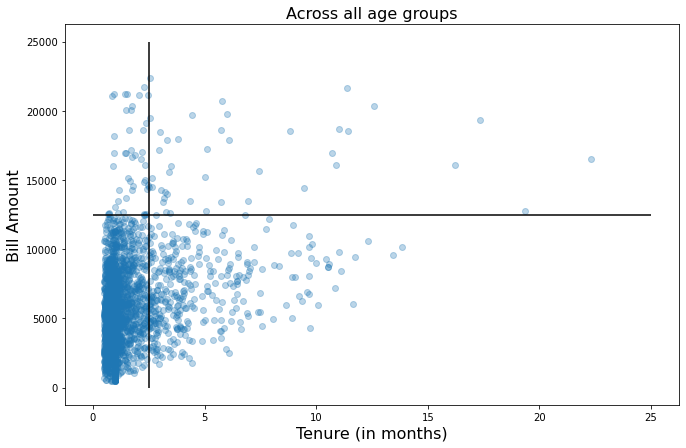

In [69]:
# Bivariate Analysis
plt.figure(figsize=(11,7))
sns.regplot(df_ten_avgBA['Tenure'],df_ten_avgBA['AvgBillAmount'],fit_reg=False,scatter_kws={'alpha':0.3})
plt.xlabel('Tenure (in months)',fontsize = 16)
plt.ylabel('Bill Amount',fontsize = 16)
plt.title("Across all age groups",fontsize = 16)
plt.vlines(2.5,ymin = 0,ymax=25000)
plt.hlines(12500,xmin = 0,xmax=25)
plt.show()

We can see a positive correlation between Tenure and AvgBillAmount. So as the Tenure increases, the AvgBillAmount also tends to increase.

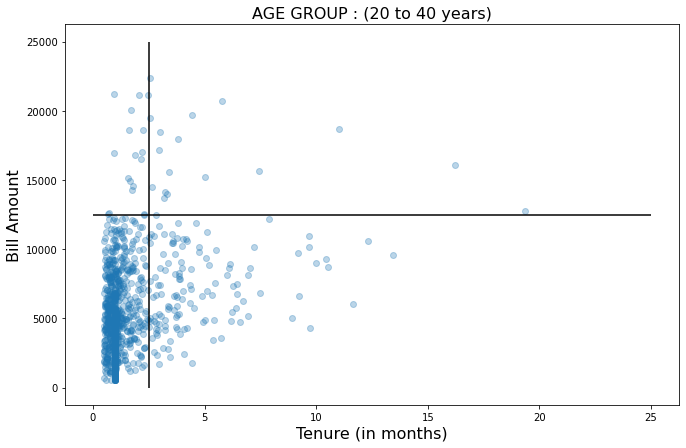

In [70]:
# Bivariate Analysis
plt.figure(figsize=(11,7))
sns.regplot(df_ten_avgBA_age2040['Tenure'],df_ten_avgBA_age2040['AvgBillAmount'],fit_reg=False,scatter_kws={'alpha':0.3})
plt.xlabel('Tenure (in months)',fontsize = 16)
plt.ylabel('Bill Amount',fontsize = 16)
plt.title("AGE GROUP : (20 to 40 years)",fontsize = 16)
plt.vlines(2.5,ymin = 0,ymax=25000)
plt.hlines(12500,xmin = 0,xmax=25)
plt.show()

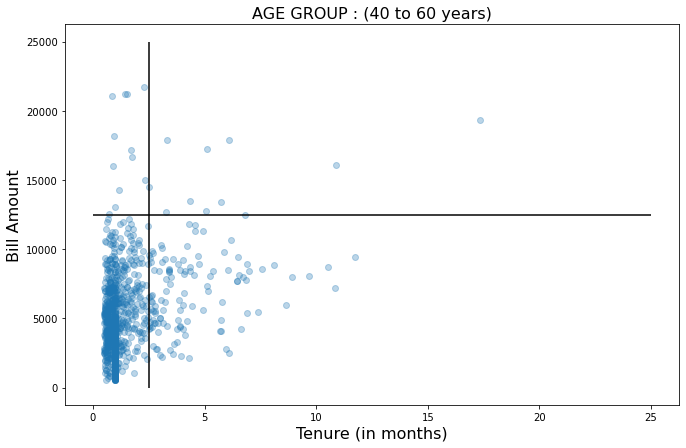

In [71]:
# Bivariate Analysis
plt.figure(figsize=(11,7))
sns.regplot(df_ten_avgBA_age4060['Tenure'],df_ten_avgBA_age4060['AvgBillAmount'],fit_reg=False,scatter_kws={'alpha':0.3})
plt.xlabel('Tenure (in months)',fontsize = 16)
plt.ylabel('Bill Amount',fontsize = 16)
plt.title("AGE GROUP : (40 to 60 years)",fontsize = 16)
plt.vlines(2.5,ymin = 0,ymax=25000)
plt.hlines(12500,xmin = 0,xmax=25)
plt.show()

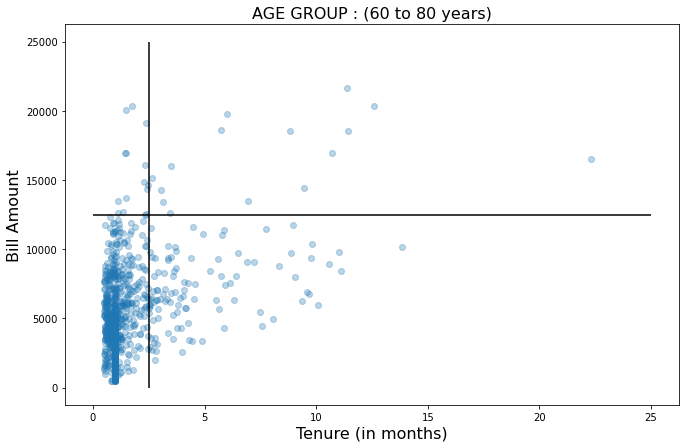

In [72]:
# Bivariate Analysis
plt.figure(figsize=(11,7))
sns.regplot(df_ten_avgBA_age6080['Tenure'],df_ten_avgBA_age6080['AvgBillAmount'],fit_reg=False,scatter_kws={'alpha':0.3})
plt.xlabel('Tenure (in months)',fontsize = 16)
plt.ylabel('Bill Amount',fontsize = 16)
plt.title("AGE GROUP : (60 to 80 years)",fontsize = 16)
plt.vlines(2.5,ymin = 0,ymax=25000)
plt.hlines(12500,xmin = 0,xmax=25)
plt.show()

In [14]:
print("No. of customers with avgBillAmount <= 12.5k & tenure <= 2.5 years :",len(df_ten_avgBA.loc[(df['AvgBillAmount']<=12500) & (df['Tenure']<=2.5)]))
print("No. of customers with avgBillAmount <= 12.5k & tenure > 2.5 years :",len(df_ten_avgBA.loc[(df['AvgBillAmount']<=12500) & (df['Tenure']>2.5)]))
print("No. of customers with avgBillAmount > 12.5k & tenure <= 2.5 years :",len(df_ten_avgBA.loc[(df['AvgBillAmount']>12500) & (df['Tenure']<=2.5)]))
print("No. of customers with avgBillAmount > 12.5k & tenure > 2.5 years :",len(df_ten_avgBA.loc[(df['AvgBillAmount']>12500) & (df['Tenure']>2.5)]))

No. of customers with avgBillAmount <= 12.5k & tenure <= 2.5 years : 2494
No. of customers with avgBillAmount <= 12.5k & tenure > 2.5 years : 352
No. of customers with avgBillAmount > 12.5k & tenure <= 2.5 years : 43
No. of customers with avgBillAmount > 12.5k & tenure > 2.5 years : 42


As we can see from the plot, there are high density of customers who have been with the organization for less than  2 to 2.5 years and generating less than approximately $12500 in average bill amount. So looking at the data, we can map the customers into 4 different clusters as follows:

1. AvgBillAmount <= 12.5k & tenure <= 2.5 years - New customers with low revenue generation - (Cluster where new offers can be introduced for pitching long term benefits as well as offers like free home delivery for Bill above 15k)

2. AvgBillAmount <= 12.5k & tenure > 2.5 years - Old customers with low revenue generation - (Cluster where customers can be provided with offers like free home delivery for Bill above 15k)

3. AvgBillAmount > 12.5k & tenure <= 2.5 years - New customers with high revenue generation - (Cluster where new offers can be introduced for pitching long term benefits)

4. AvgBillAmount > 12.5k & tenure > 2.5 years - Old customers with high revenue generation - (Less attention can be focussed towards this cluster as the organization already have had these customers for longer period and are generating high revenues)

***Each cluster can also be further analysed individually to find out the buying behaviours of the customers within that cluster.***

# Do we see lower avg bill generation from customers who have registered a complaint?

In [115]:
df_cmpln_avgBA = df[['Complain','AvgBillAmount','CityTier']]

In [116]:
df_cmpln_avgBA['Complain'].value_counts()

0    2104
1     827
Name: Complain, dtype: int64

Text(0.5, 0, 'Complaint Registered?')

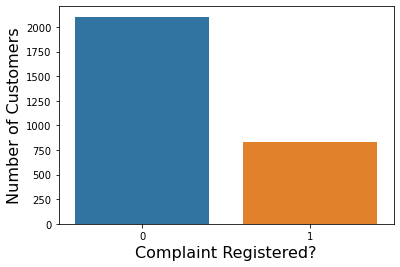

In [120]:
sns.countplot(df_cmpln_avgBA['Complain'])
plt.ylabel("Number of Customers",fontsize = 16)
plt.xlabel("Complaint Registered?",fontsize = 16)

Text(0.5, 0, 'Complaint Registered?')

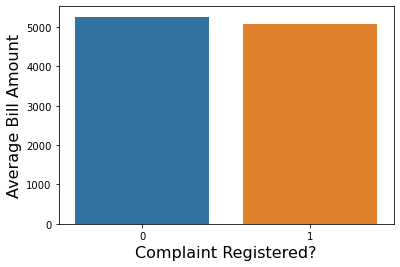

In [121]:
# Bivariate Analysis
sns.barplot(df_cmpln_avgBA['Complain'],df_cmpln_avgBA['AvgBillAmount'],ci = False)
plt.ylabel("Average Bill Amount",fontsize = 16)
plt.xlabel("Complaint Registered?",fontsize = 16)

As we can see from the plot above, the mean of AvgBillAmount of customers who registered a complain is more or less the same as the customers who did not register a complain. The mean of AvgBillAmount is slightly low for customers who did register a complain, but such low difference will not enough for us take any business decision w.r.t such customers. 

# There are 3 city tiers mentioned in the dataset. Generally, tier 1 cities are considered as the major metro cities where the people tend to have a higher buying capacity. So, accordingly, can we say that tier 1 city customers tends to generate more avg revenue as compared to tier 2 and tier 3 city customers?

In [19]:
df_citytier_ppm_avgBA = df[['CityTier','PreferredPaymentMode','AvgBillAmount']]

Text(0.5, 0, 'City Tier')

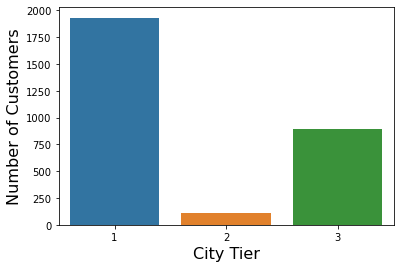

In [78]:
sns.countplot(df_citytier_ppm_avgBA['CityTier'])
plt.ylabel("Number of Customers",fontsize = 16)
plt.xlabel('City Tier',fontsize = 16)

Text(0.5, 0, 'City Tier')

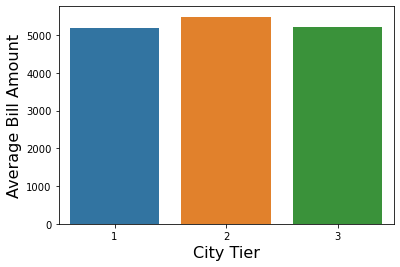

In [79]:
# Bivariate Analysis
sns.barplot(df_citytier_ppm_avgBA['CityTier'],df['AvgBillAmount'],ci=False)
plt.ylabel("Average Bill Amount",fontsize = 16)
plt.xlabel('City Tier',fontsize = 16)

Text(0.5, 0, 'City Tier')

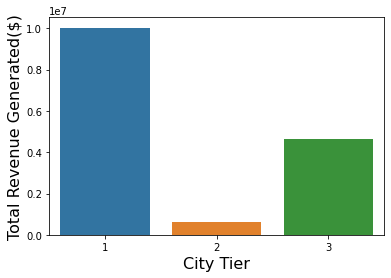

In [82]:
# Bivariate Analysis
sns.barplot(df_citytier_ppm_avgBA['CityTier'],df['AvgBillAmount'],ci=False,estimator=sum)
plt.ylabel("Total Revenue Generated($)",fontsize = 16)
plt.xlabel('City Tier',fontsize = 16)

As we can see from the plot, CityTier 2 has a slightly higher mean of AvgBillAmount as compared to CityTier 1 & 3 which are more or less the same. So, our assumption here that tier 1 city customers tends to generate more avg revenue cannot be validated looking at the plot. There exist a more sophisticated way for testing these assumptions which you will learn in the SMDM course where you will create a hypothesis based on the assumption and decide whether to reject or fail to reject the null hypothesis.

# There are different payment modes (CC, DC, COD, wallet & UPI). Depending on the city tiers, which are the preferred payment modes used by the customers?

In [83]:
pd.crosstab(df_citytier_ppm_avgBA['CityTier'],df_citytier_ppm_avgBA['PreferredPaymentMode'])

PreferredPaymentMode,COD,Credit Card,Debit Card,E wallet,UPI
CityTier,,,,,
1,185,731,883,0,131
2,8,26,26,0,49
3,69,177,303,313,30


In [84]:
print(np.round(883/1930*100,2),"% of customers prefer Debit card as preferred payment option in Tier 1 cities.")
print(np.round(49/109*100,2),"% of customers prefer UPI as preferred payment option in Tier 2 cities.")
print(np.round(313/892*100,2),"% of customers prefer E wallet as preferred payment option in Tier 3 cities.")

45.75 % of customers prefer Debit card as preferred payment option in Tier 1 cities.
44.95 % of customers prefer UPI as preferred payment option in Tier 2 cities.
35.09 % of customers prefer E wallet as preferred payment option in Tier 3 cities.


Text(0.5, 0, 'City Tier')

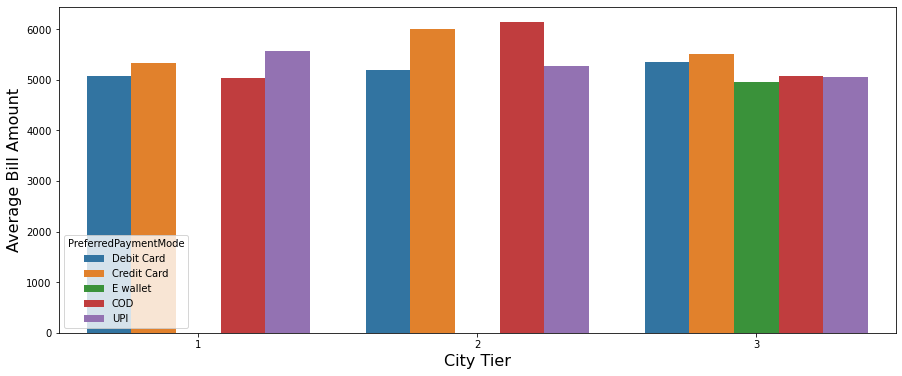

In [88]:
# Multivariate Analysis
plt.figure(figsize=(15,6))
sns.barplot(x = df_citytier_ppm_avgBA['CityTier'],y = df_citytier_ppm_avgBA['AvgBillAmount'],
            hue = df_citytier_ppm_avgBA['PreferredPaymentMode'],ci = False)
plt.ylabel("Average Bill Amount",fontsize = 16)
plt.xlabel('City Tier',fontsize = 16)

Text(0.5, 0, 'City Tier')

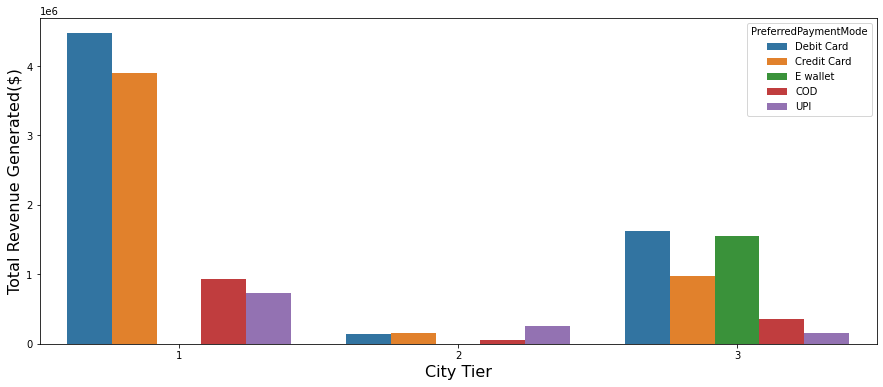

In [89]:
# Multivariate Analysis
plt.figure(figsize=(15,6))
sns.barplot(x = df_citytier_ppm_avgBA['CityTier'],y = df_citytier_ppm_avgBA['AvgBillAmount'],
            hue = df_citytier_ppm_avgBA['PreferredPaymentMode'],ci = False,estimator=sum)
plt.ylabel("Total Revenue Generated($)",fontsize = 16)
plt.xlabel('City Tier',fontsize = 16)

As we can see, E wallet is used only by the tier 3 city customers. And most of the customers prefer using E wallet in tier 3 cities. As almost 35 percent of the tier 3 city customers tend prefer E wallet as the payment method, most revenue will be generated from such customers from tier 3 cities.

Also, almost 46 percent of the tier 1 city customers tend prefer Debit Card as the payment method, so most revenue will be generated from such customers from tier 1 cities.

Moreover, almost 45 percent of the tier 2 city customers tend prefer UPI as the payment method, so most revenue will be generated from such customers from tier 2 cities.

# Is the average bill amount affected by gender?

In [26]:
df_gndr_avgBA = df[['Gender','AvgBillAmount']]

In [27]:
df_gndr_avgBA['Gender'].value_counts()

Male      1763
Female    1168
Name: Gender, dtype: int64

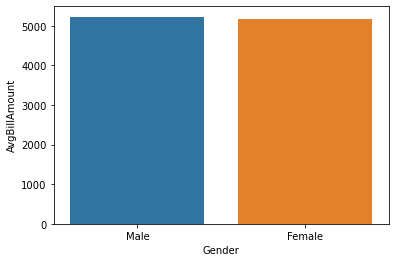

In [28]:
# Bivariate Analysis
sns.barplot(df_gndr_avgBA['Gender'],df_gndr_avgBA['AvgBillAmount'],ci = False)

From the plot above, it looks like the AvgBillAmount is not affected by Gender.

# Does age have any effect on the revenue generation?

In [29]:
df_age_avgBA = df[['Age','AvgBillAmount','Tenure']]

In [30]:
df_age_avgBA = df_age_avgBA[(df_age_avgBA['AvgBillAmount']>10000) & (df_age_avgBA['Tenure']>2)]

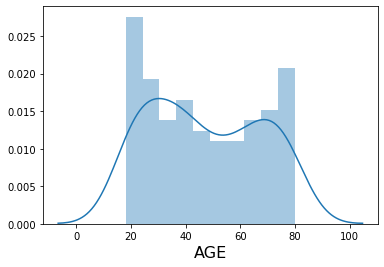

In [31]:
# Bivariate Analysis
# plt.figure(figsize=(11,7))
sns.distplot(df_age_avgBA['Age'],bins = 10)
plt.xlabel("AGE",fontsize = 16)
plt.show()

# Do we have a higher revenue generation during the Discount period because of higher footfall?

In [46]:
df_ftfll_avgBA = df[['FootfallInDiscountPeriod','AvgBillAmount','AvgNumberOfProduct']]

Text(0, 0.5, 'Avg No. of Products bought')

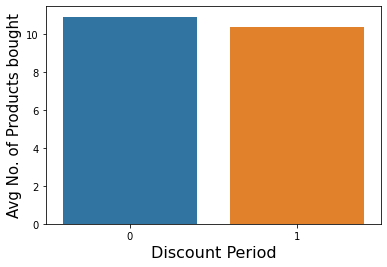

In [64]:
sns.barplot(df_ftfll_avgBA['FootfallInDiscountPeriod'], df_ftfll_avgBA['AvgNumberOfProduct'],estimator=np.mean,ci = False)
plt.xlabel('Discount Period',fontsize = 16)
plt.ylabel("Avg No. of Products bought",fontsize = 15)

Text(0, 0.5, 'Average Bill Amount')

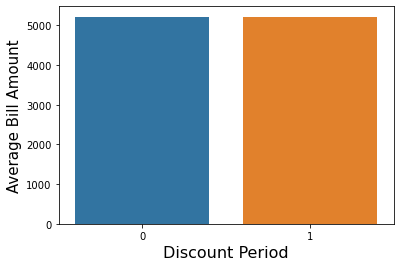

In [91]:
sns.barplot(df_ftfll_avgBA['FootfallInDiscountPeriod'], df_ftfll_avgBA['AvgBillAmount'],estimator=np.mean,ci = False)
plt.xlabel('Discount Period',fontsize = 16)
plt.ylabel("Average Bill Amount",fontsize = 15)

Text(0, 0.5, 'Number of Customers')

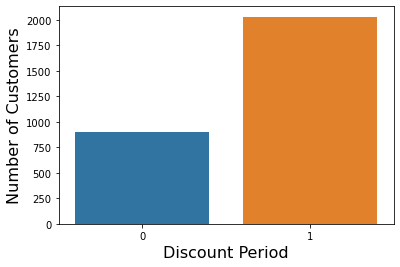

In [92]:
sns.countplot(df_ftfll_avgBA['FootfallInDiscountPeriod'])
plt.xlabel('Discount Period',fontsize = 16)
plt.ylabel("Number of Customers",fontsize = 16)

We can clearly see that there are higher footfall in number of customers during the discount period.

Text(0, 0.5, 'Total Revenue Generated($)')

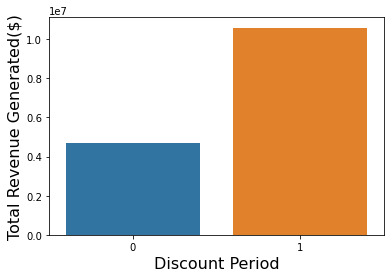

In [93]:
# Bivariate Analysis
sns.barplot(df_ftfll_avgBA['FootfallInDiscountPeriod'],df_ftfll_avgBA['AvgBillAmount'],estimator=sum,ci = False)
plt.xlabel('Discount Period',fontsize = 16)
plt.ylabel("Total Revenue Generated($)",fontsize = 16)

So, from the above 2 plots, we can see that there is no much difference mean of AvgBillAmount, but clearly as the footfall is higher, the revenue generation during this period is also higher. Moreover, interestingly, even it being a discount period, we can see that mean of AvgBillAmount is same as that when its not a discount period. This helps us interpret that people will tend to spend the same amount, inspite whether there is Discount or not.

# How does our revenue generation get affected by the products taken from the promotional counter against the ones that are not?

In [110]:
df_prmprdt_avgBA = df[['TakenProdFromPromo','AvgBillAmount']]

In [111]:
df_prmprdt_avgBA['TakenProdFromPromo'].value_counts()

0    1877
1    1054
Name: TakenProdFromPromo, dtype: int64

Text(0, 0.5, 'Number of Customers')

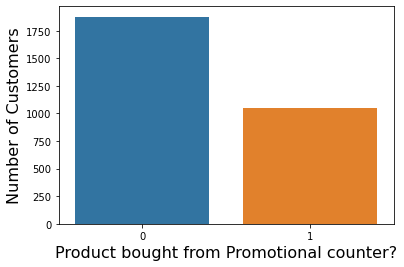

In [113]:
# Bivariate Analysis
sns.countplot(df_prmprdt_avgBA['TakenProdFromPromo'])
plt.xlabel('Product bought from Promotional counter?',fontsize = 16)
plt.ylabel("Number of Customers",fontsize = 16)

Text(0, 0.5, 'Total Revenue Generated')

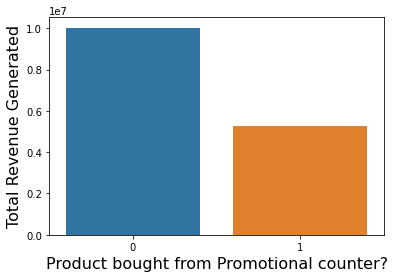

In [114]:
# Bivariate Analysis
sns.barplot(df_prmprdt_avgBA['TakenProdFromPromo'],df_prmprdt_avgBA['AvgBillAmount'],estimator=sum,ci = False)
plt.xlabel('Product bought from Promotional counter?',fontsize = 16)
plt.ylabel('Total Revenue Generated',fontsize = 16)

In [98]:
df_prmprdt_avgBA['AvgBillAmount'].sum()

15269118.4584

In [99]:
df_prmprdt_avgBA[df_prmprdt_avgBA['TakenProdFromPromo'] == 1].sum()

TakenProdFromPromo       1054.000
AvgBillAmount         5247117.567
dtype: float64

Approximately 35% of the customers tend to by products from the promotional counter which seems to contribute to around 35% of the total revenue generated. 
So this looks like to be a successful initiative in generating revenue.

# Customers from which tier cities tend to opt for Free Home Deliveries more? Do these customers have any effect on the revenue generated?

In [100]:
df_homedel_avgBA = df[['CityTier','TakenFreeDelivery','AvgBillAmount']]
df_homedel_avgBA['TakenFreeDelivery'].value_counts()

1    2104
0     827
Name: TakenFreeDelivery, dtype: int64

Overall approximately 72% customers have opted for free home delivery.

In [101]:
pd.crosstab(df_homedel_avgBA['CityTier'],df_homedel_avgBA['TakenFreeDelivery'])

TakenFreeDelivery,0,1
CityTier,,
1,549,1381
2,24,85
3,254,638


In [102]:
print(np.round(1381/(1381+548)*100,2),"% of customers who opted for free home delivery in Tier 1 cities.")
print(np.round(85/(85+24)*100,2),"% of customers who opted for free home delivery in Tier 2 cities.")
print(np.round(638/(638+254)*100,2),"% of customers who opted for free home delivery in Tier 3 cities.")

71.59 % of customers who opted for free home delivery in Tier 1 cities.
77.98 % of customers who opted for free home delivery in Tier 2 cities.
71.52 % of customers who opted for free home delivery in Tier 3 cities.


Text(0, 0.5, 'Average Bill Amount')

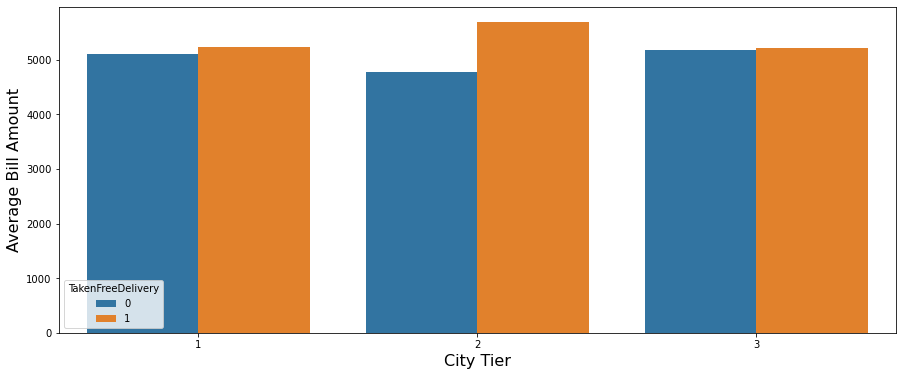

In [125]:
# Multivariate Analysis
plt.figure(figsize=(15,6))
sns.barplot(x = df_homedel_avgBA['CityTier'],y = df_homedel_avgBA['AvgBillAmount'],
            hue = df_homedel_avgBA['TakenFreeDelivery'],ci = False)
plt.xlabel('City Tier',fontsize = 16)
plt.ylabel("Average Bill Amount",fontsize = 16)

We can see that customers from tier 2 cities who opt for free home delivery generate slightly higher revenues as compared to the ones who don't opt.

# Should we target customers who buy less number of products to generate higher revenue?

In [126]:
df_noofprdts_avgBA = df[['AvgNumberOfProduct','AvgBillAmount']]

In [127]:
df_noofprdts_avgBA.corr()

,AvgNumberOfProduct,AvgBillAmount
AvgNumberOfProduct,1.000000,0.750661
AvgBillAmount,0.750661,1.000000


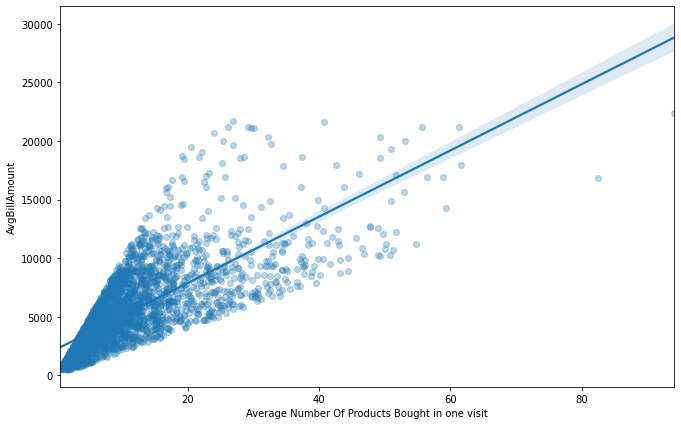

In [128]:
# Bivariate Analysis
plt.figure(figsize=(11,7))
sns.regplot(df_noofprdts_avgBA['AvgNumberOfProduct'],df_noofprdts_avgBA['AvgBillAmount'],scatter_kws={'alpha':0.3})
plt.xlabel('Average Number Of Products Bought in one visit')
plt.show()

# Which customers can we target to promote their membership for higher revenue generation?

In [129]:
df_mmbrshp_avgBA = df[['CityTier','MembershipCard','AvgBillAmount']]
df_mmbrshp_avgBA['MembershipCard'].value_counts()

Gold       1515
Silver      936
Diamond     480
Name: MembershipCard, dtype: int64

16.37% of the customers hold a Diamond Membership Card

In [130]:
pd.crosstab(df_mmbrshp_avgBA['CityTier'],df_mmbrshp_avgBA['MembershipCard'])

MembershipCard,Diamond,Gold,Silver
CityTier,,,
1,302,1015,613
2,21,61,27
3,157,439,296


In [131]:
print("There are",np.round(302/1930*100,2),"% of customers in Tier 1 cities who hold a Diamond Membership Card.")
print("There are",np.round(21/109*100,2),"% of customers in Tier 2 cities who hold a Diamond Membership Card.")
print("There are",np.round(157/892*100,2),"% of customers in Tier 3 cities who hold a Diamond Membership Card.")

There are 15.65 % of customers in Tier 1 cities who hold a Diamond Membership Card.
There are 19.27 % of customers in Tier 2 cities who hold a Diamond Membership Card.
There are 17.6 % of customers in Tier 3 cities who hold a Diamond Membership Card.


Text(0, 0.5, 'Average Bill Amount')

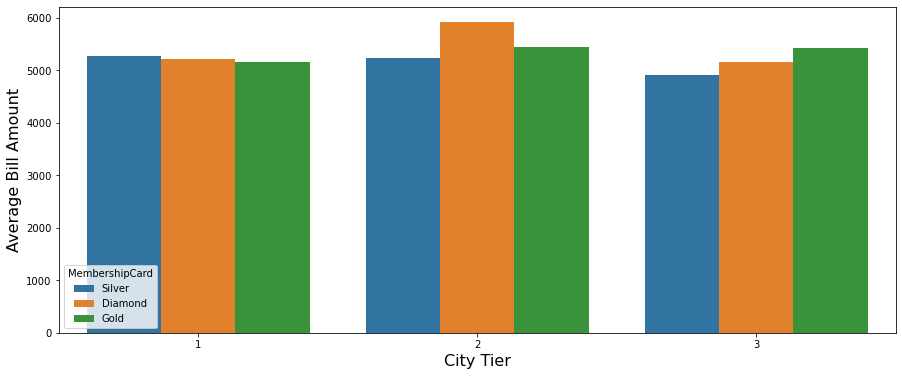

In [132]:
# Bivariate Analysis
plt.figure(figsize=(15,6))
sns.barplot(x = df_mmbrshp_avgBA['CityTier'],y = df_mmbrshp_avgBA['AvgBillAmount'], hue = df_mmbrshp_avgBA['MembershipCard'],ci = False)
plt.xlabel('City Tier',fontsize = 16)
plt.ylabel("Average Bill Amount",fontsize = 16)

# Does a satisfied customer tend to generate higher revenue?

In [133]:
df_stsfctnscr_avgBA = df[['CityTier','SatisfactionScore','AvgBillAmount']]

Text(0, 0.5, 'Number of Customers')

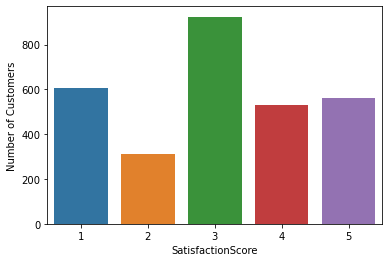

In [151]:
sns.countplot(df_stsfctnscr_avgBA['SatisfactionScore'])
plt.ylabel("Number of Customers")

Most customers seems to have rated a satisfaction score of 3

Text(0, 0.5, 'Average Bill Amount')

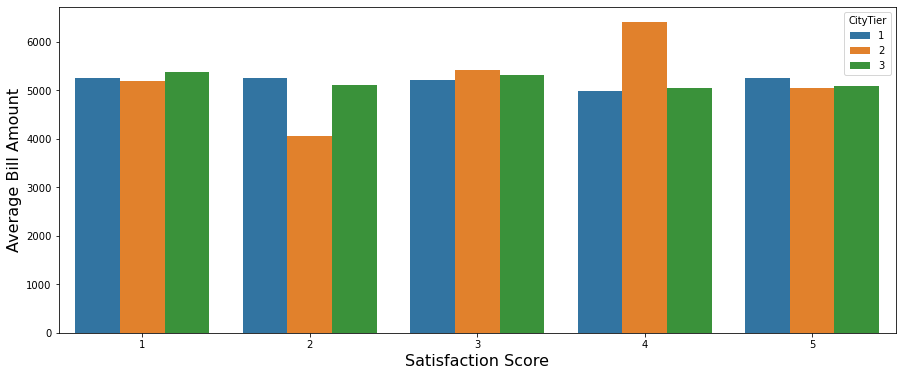

In [134]:
# Bivariate Analysis
plt.figure(figsize=(15,6))
sns.barplot(df_stsfctnscr_avgBA['SatisfactionScore'],df_stsfctnscr_avgBA['AvgBillAmount'],hue = df_stsfctnscr_avgBA['CityTier'],ci = False)
plt.xlabel('Satisfaction Score',fontsize = 16)
plt.ylabel("Average Bill Amount",fontsize = 16)

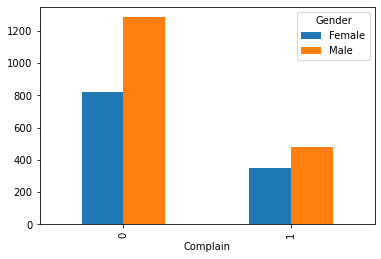

In [140]:
pd.crosstab(df['Complain'],df['Gender']).plot(kind = 'bar')

Text(0, 0.5, 'Number of Customers')

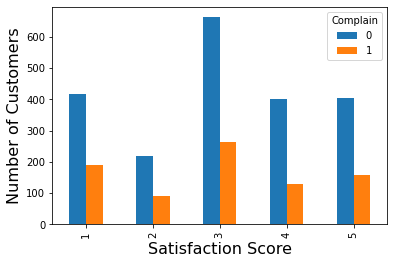

In [147]:
pd.crosstab(df['SatisfactionScore'],df['Complain']).plot(kind = 'bar')
plt.xlabel('Satisfaction Score',fontsize = 16)
plt.ylabel("Number of Customers",fontsize = 16)